# Identifying putative degradation using mass spectral molecular networking

To identify putative degradation products we performed a pair-wise correlation analysis of all metabolic features correlating significantly with year of sampling (Spearman's rho, FDR-adjusted P-value < 0.05) using Pearson’s ρ. Putative degradation was then defined as two metabolic features, which 1) correlate significantly with year of sampling (FDR-adjusted P-value < 0.05) , 2) correlate negatively with each other (Pearson’s r < 0; P-value < 0.05), 3) exhibit chemical structural relationship either through high tandem mass spectral similarity (cosine > 0.7) or shared MS2LDA substructural motifs. For visualization and chemical structural annotation, putative degradation products were identified within the mass spectral molecular network by adding edges (connecting lines) between two nodes, meeting criteria 1), 2) and 3). 

load libraries

In [1]:
import pandas as pd
import itertools
from scipy.stats.stats import pearsonr
import session_info

load Spearman correlation results (year)

In [2]:
corres = pd.read_csv('output/SpearmanCorrelation_year.txt', sep = '\t')

load feature table

In [3]:
ft = pd.read_csv('output/RAPCA_ImputedData_Rank100_NA_5.tsv', sep = '\t', index_col = 0)

In [4]:
ft = ft.T

In [5]:
corres.head()

,estimate.cor,p.value,p.value.corrected,cluster id
0,-0.251433,0.000329,0.004146,5
1,-0.095218,0.179855,0.371396,9
2,0.004312,0.951682,0.977106,10
3,0.131672,0.063091,0.188972,14
4,0.159743,0.023854,0.098516,16


In [6]:
ft_sig = ft[list(corres['cluster id'][corres['p.value.corrected'] <= 0.05])]

calculate all pairwise correlations between features that correlated significantly with year (FDR-corrected p-value < 0.05)

In [8]:
correlations = {}
columns = ft_sig.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[str(col_a) + '__' + str(col_b)] = pearsonr(ft_sig.loc[:, col_a], ft_sig.loc[:, col_b])

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

#print(result.sort_index())

select only negative correlations with p-value < 0.05

In [9]:
result = result[result['p-value'] <= 0.05]
result = result[result['PCC'] <= 0]

In [10]:
result.insert (0, "ID2", result.index.str.split('__').str[1])
result.insert (0, "ID1", result.index.str.split('__').str[0])

In [11]:
result.head()

,ID1,ID2,PCC,p-value
5__25,5,25,-0.175298,0.013035
5__282,5,282,-0.159222,0.024321
5__486,5,486,-0.303904,0.000012
5__718,5,718,-0.158895,0.024619
5__724,5,724,-0.241480,0.000572


In [12]:
result.shape

(1645, 4)

In [13]:
result[result['PCC'] <= -0.5]

,ID1,ID2,PCC,p-value
133__1338,133,1338,-0.503617,2.932484e-14


plot selected negative correlations

In [14]:
import matplotlib.pyplot as plt

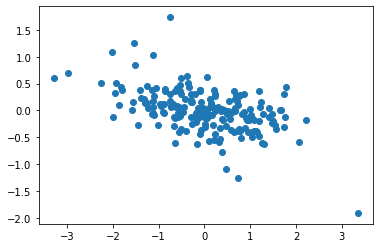

In [15]:
plt.scatter(ft[133], ft[1338])
plt.show() # Depending on whether you use IPython or interactive mode, etc.

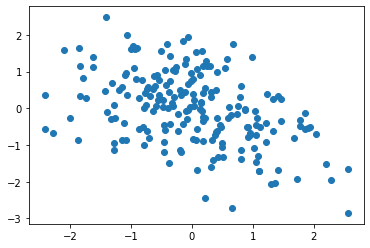

In [16]:
plt.scatter(ft[29], ft[552])
plt.show() # Depending on whether you use IPython or interactive mode, etc.

create network from correlations

In [17]:
import networkx as nx

In [18]:
resultList = result.values.tolist()

In [19]:
degrad = nx.MultiGraph()

In [20]:
for i in range(len(resultList)):
    degrad.add_edge(resultList[i][0], resultList[i][1], coefficient=resultList[i][2], pvalue =resultList[i][3], interaction = 'degradation')

merge correlation network with ms2lda network

In [21]:
ms2lda = nx.read_graphml('../../GNPS_output/MS2LDA/MS2LDA_MOTIFDB-86bc5968-download_cytoscape_data-main.graphml')

In [22]:
ms2lda_degradation = nx.compose(ms2lda,degrad)

In [23]:
ms2lda.edges[('483', '573', 1)]

{'MEH': 483.0,
 'shared_motifs': 'gnps_motif_7.m2m',
 'EdgeAnnotation': 'gnps_motif_7.m2m',
 'TopSharedMotifs': 'gnps_motif_7.m2m',
 'OtherScore': 483.0,
 'Cosine': 0.721,
 'DeltaMZ': 23.346999999999998,
 'interaction': 'gnps_motif_7.m2m',
 'EdgeType': 'Mass2Motif',
 'ComponentIndex': 44}

In [24]:
ms2lda_degradation.edges[('5', '797', 0)]

{'coefficient': -0.19435036212359863,
 'pvalue': 0.005821927046518718,
 'interaction': 'degradation'}

In [25]:
ms2lda.nodes['483']

{'mb_motif_33.m2m': 0.0,
 'urine_mass2motif_203.m2m': 0.0,
 'urine_mass2motif_282.m2m': 0.0,
 'urine_mass2motif_67.m2m': 0.0,
 'motif_292': 0.0,
 'urine_mass2motif_137.m2m': 0.0,
 'motif_276': 0.0,
 'mb_motif_150.m2m': 0.0,
 'mb_motif_4.m2m': 0.0,
 'urine_mass2motif_66.m2m': 0.0,
 'urine_mass2motif_88.m2m': 0.0,
 'urine_mass2motif_247.m2m': 0.0,
 'motif_302': 0.0,
 'motif_287': 0.0,
 'motif_235': 0.0,
 'urine_mass2motif_229.m2m': 0.0,
 'urine_mass2motif_111.m2m': 0.0,
 'parentrt': '0.0',
 'urine_mass2motif_173.m2m': 0.0,
 'motif_279': 0.0,
 'motif_250': 0.0,
 'overlap': '0.9999794069264408',
 'gnps_motif_12.m2m': 0.0,
 'motif_215': 0.0,
 'gnps_motif_13.m2m': 0.0,
 'motif_293': 0.0,
 'document': '483',
 'gnps_motif_3.m2m': 0.0,
 'urine_mass2motif_176.m2m': 0.0,
 'motif_274': 0.0,
 'gnps_motif_48.m2m': 0.0,
 'gnps_motif_25.m2m': 0.0,
 'urine_mass2motif_237.m2m': 0.0,
 'gnps_motif_14.m2m': 0.0,
 'urine_mass2motif_95.m2m': 0.0,
 'motif_212': 0.0,
 'gnps_motif_37.m2m': 0.0,
 'urine_mass2mot

remove correlations between features with no structural similarity (cosine) or shared motifs

In [26]:
edgelist = list(ms2lda_degradation.edges(data=True, keys=True))

In [27]:
for u,v,k,data in edgelist:
    if(len(data) == 3 and list(data.keys()) == ['coefficient', 'pvalue', 'interaction']):
        n1 = [s for s in list({x:y for x,y in ms2lda_degradation.nodes[u].items() if y!=0}.keys()) if "motif" in s]
        n2 = [s for s in list({x:y for x,y in ms2lda_degradation.nodes[v].items() if y!=0}.keys()) if "motif" in s]
        #print(set(n1).intersection(set(n2)))
        if len(set(n1).intersection(set(n2))) <= 3:
            #print(len(set(n1).intersection(set(n2))))
            ms2lda_degradation.remove_edge(u,v,key=k)

In [28]:
nx.write_graphml(ms2lda_degradation, "output/MS2LDA_Degradation_merged_Network.graphml", infer_numeric_types = False)

In [29]:
session_info.show()